# <span style = "color:red;">흑흑 프로젝트 미완성입니다. 제출기한 내에 완성하여 제출하지는 못했지만 -6/18까지 수정 업데이트해 나갈 예정입니다.</span>

# [AIFFEL_Going Deeper_6] 인공지능으로 세상에 없던 새로운 패션 만들기

## 프로젝트 내용    
네이버 영화리뷰 감성분석하기    

## 목차
#### <span style = "color:red;">1. 네이버 영화리뷰 감성분석 프로젝트</span>
**- Step 1. 필요한 라이브러리 불러오기**    
**- Step 2. 데이터 준비와 확인**




**- Step 3. 인물이 주인공이 아닌, 다른 대상에 대한 아웃포커싱 사진 만들기**                  
**- Step 4. 배경사진을 다른 이미지 합성_10번째 사진_동물 소 + 다른 배경 합치기**           
         
   
#### 2. 결론      
#### 3. 루브릭 관련 고려한 점     
#### 4. 회고          
#### 5. References         

## 글씨 색 표시
### <span style = "color:orange;">- 노랑: 질문! or 짚고가자!</span>    
### <span style = "color:red;">- 빨강: 중요 or 특이사항</span>

# step 1. 주요 라이브러리 버전을 확인하고 진행

In [4]:
import tensorflow as tf
import imageio

print(tf.__version__)
print(imageio.__version__)

2.6.0
2.9.0


# step 2. 작업환경 구성하기

$ mkdir -p ~/aiffel/dcgan_newimage/cifar10/generated_samples
$ mkdir -p ~/aiffel/dcgan_newimage/cifar10/training_checkpoints
$ mkdir -p ~/aiffel/dcgan_newimage/cifar10/training_history

의미는 쉘에서 입력함으로써 위와 같은 디렉토리를 만드는 것입니다.

# step 3. 데이터셋 구성하기

In [5]:
cifar10 = tf.keras.datasets.cifar10

(train_x, _), (test_x, _) = cifar10.load_data()

train_x.shape

170508288/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

CIFAR-10 데이터셋도 tf.keras 안에 있는 datasets에 포함되어 있어서, 아래와 같이 손쉽게 데이터셋을 구성할 수 있습니다.

### 라벨이 필요없어서 그런가? 역시 여기에서도 언더스코어?를 통해서 train_x과 test_x만 불러왔다.

학습에 사용할 train_x의 이미지를 -1, 1로 정규화합니다.
로드한 학습 데이터를 시각화를 통해 확인해 봅시다.
tf.data.Dataset 모듈의 from_tensor_slices() 함수를 사용하여 미니배치 데이터셋을 구성해 봅시다.


학습 시간이 너무 오래 걸린다면 한 종류의 데이터만 추출해 진행해도 좋습니다. 아래 코드는 참고만 하세요.

# step 3-1. 학습에 사용할 train_x의 이미지를 -1, 1로 정규화합니다.

In [6]:
print("max pixel:", train_x.max())
print("min pixel:", train_x.min())

max pixel: 255
min pixel: 0


In [ ]:
## train_x의 최소 픽셀과 맥스 픽셀값이 무엇인지 확인해본다.

# 예시
# Fashion MNIST 또한 MNIST와 같이 28x28 픽셀의 이미지로, 각 픽셀은 0~255 사이의 정숫값을 가집니다. 

이 데이터들도 각 픽셀값이 0~255 사이의 정숫값을 가지는 것을 알 수 있음 

### 노랑 궁금증, 픽셀값들이 정숫값이 아닌 실숫값들을 가질 수도 있나?

이번 프로젝트에서는 각 픽셀을 -1, 1로 정규화시켜서 사용할 예정이므로, 중간값을 0으로 맞춰주기 위해 127.5를 뺀 후 127.5로 나눠줍니다.

우리도 이렇게 해보자

train_x - 127.5 / 127.5

음.. 이렇게 작성하면 되나? 실습과 비교해보자

In [ ]:
# train_x = (train_x - 127.5) / 127.5 # 이미지를 [-1, 1]로 정규화합니다.

# print("max pixel:", train_x.max())
# print("min pixel:", train_x.min())

오호

In [7]:
train_x = (train_x - 127.5) / 127.5

In [8]:
print("max pixel:", train_x.max())
print("min pixel:", train_x.min())

max pixel: 1.0
min pixel: -1.0


이렇게 해서 중간값은 0이 되고, 최대값은 1 최소값은 -1이 되었다.

데이터셋의 shape?

In [9]:
train_x.shape

(50000, 32, 32, 3)

32x32 크기의 이미지가 채널은 3채널 (= 3차원이 아니고?), 샘플의 개수는 50000이라는 것을 알 수 있다.


채널과 차원 헷갈리는 부분 정리하고 가기
또는 샘플 개수, 차원, 등등.... 텐서에서의 차원과 넘파이에서의 차원 등등
cifar-10 데이터셋은 컬러이미지들이므로 이미 3차원, 
흑백이미지가 아니기 때문에 채널차원에 대해 데이터셋의 shape 마지막에 1을 추가하지 않아도 된다.
채널차원....?

## 한번 첫 번째 데이터를 꺼내서 어떻게 생겼는지 확인 

In [10]:
import matplotlib.pyplot as plt

In [11]:
# plt.imshow(train_x[0].reshape(28, 28), cmap='gray')
plt.imshow(train_x[0].reshape(32, 32), cmap='gray')
plt.colorbar()
plt.show()

ValueError: cannot reshape array of size 3072 into shape (32,32)

reshape이 필요없지 않을까?

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


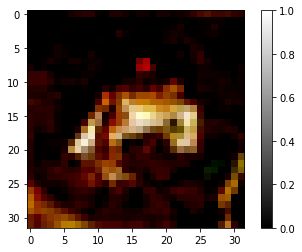

In [12]:
# plt.imshow(train_x[0].reshape(28, 28), cmap='gray')
plt.imshow(train_x[0].reshape(32, 32, 3), cmap='gray')
plt.colorbar()
plt.show()

In [ ]:
## 궁금증. cifar-10 데이터는 완전히 잘 보이는 사진으로 된 데이터가 들어있는걸까? 위 사진이 흐리게 나와서..

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


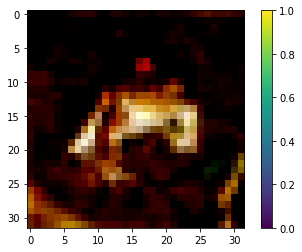

In [13]:
# cmap을 빼고 출력해보자
plt.imshow(train_x[0].reshape(32, 32, 3))
plt.colorbar()
plt.show()

오른쪽 색상바에서 차이가 있다 색에서도 조금

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


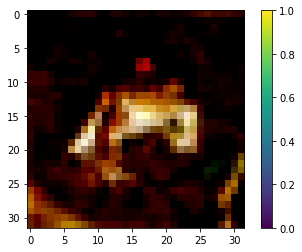

In [14]:
# reshape도 빼고 출력해보자
plt.imshow(train_x[0])
plt.colorbar()
plt.show()

결론은, reshape을 할 필요가 없는 것 같다. 이미 shape이 32,32,3이니까
실습에서는 첫번째 데이터가 신발이었는데, 바로 위의 데이터는 음 뭐인지 알기가 어렵다.
plt.colorbar() 를 이용해 오른쪽에 각 픽셀의 값과 그에 따른 색도 확인해 보았습니다. 

## 하나만 보면 아쉬우니, 열 개 정도를 한 번에 띄워볼까요?
for 문을 활용하면 간단하게 볼 수 있습니다!

In [ ]:
plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_x[i])
    plt.title(f'index: {i}')
    plt.axis('off')
plt.show()

# step 4. 생성자 모델 구현하기

(32, 32, 3)의 shape를 가진 이미지를 생성하는 생성자 모델 구현 함수를 작성해 봅시다.
noise = tf.random.normal([1, 100])로 생성된 랜덤 노이즈를 입력으로 하여 방금 구현한 생성자로 랜덤 이미지를 생성해 봅시다.
생성된 랜덤 이미지가 생성자 출력 규격에 잘 맞는지 확인해 봅시다.

# step 5. 판별자 모델 구현하기

(32, 32, 3)의 이미지를 입력으로 받아 1dim을 판별결과를 출력하는 판별자 모델 구현 함수를 작성해 봅시다.
위 STEP 2에서 생성한 랜덤 이미지를 판별자 모델이 판별한 결과값을 확인해 봅시다.

# step 6. 손실함수와 최적화 함수 구현하기

생성자와 판별자의 손실함수(loss)를 구현해 봅시다.
판별자의 출력값을 가지고 실제/생성(real/fake) 이미지 판별 정확도(accuracy)를 계산하는 함수를 구현해 봅시다.
생성자와 판별자를 최적화하는 optimizer를 정의합니다.

# STEP 7. 훈련과정 상세 기능 구현하기

1개 미니배치의 훈련 과정을 처리하는 train_step() 함수를 구현해 봅시다.

16개의 고정된 seed를 입력으로 하여 훈련 과정 동안 생성한 이미지를 시각화하는 generate_and_save_images() 함수를 구현해 봅시다.

훈련 epoch마다 생성자/판별자의 loss 및 판별자의 실제/생성(real/fake) 이미지 판별 accuracy 히스토리(history)를 그래프로 시각화하는 draw_train_history() 함수를 구현해 봅시다.

training_checkpoints 디렉토리에 몇 epoch마다 모델을 저장하는 checkpoint 모듈을 설정해 봅시다.

# STEP 8. 학습 과정 진행하기

위 STEP 5에서 구현한 기능들을 활용하여 최소 50 epoch만큼의 모델 학습을 진행해 봅시다.
학습 과정에서 생성된 샘플 이미지로 만든 gif 파일을 통해 학습 진행 과정을 시각적으로 표현해 봅시다.
학습 과정을 담은 샘플 이미지, gif 파일, 학습 진행 그래프 이미지를 함께 제출합니다.


(참고) 학습 과정 중 학습 epoch를 추가 진행해야 하거나, 학습한 모델을 활용하여 이미지를 생성할 필요가 생깁니다. 그럴 때마다 모델 학습을 처음부터 다시 진행한다면 시간 낭비가 될 것입니다.
우리는 위에서 checkpoint 모듈을 이용해 모델을 저장해 둔 바 있습니다. 이를 이용해 학습해 둔 모델을 로드하면 모델 재학습이 필요 없이 이런 작업을 진행할 수 있습니다.
아래는 checkpoint 모듈을 활용하여 모델을 로드하는 예시입니다.

# STEP 9. (optional) GAN 훈련 과정 개선하기

STEP 6을 진행하면서 생성된 샘플 이미지, 학습 과정 그래프 등을 통해 이전 훈련 과정의 문제점을 분석해 봅시다.
모델구조 또는 학습 과정을 개선한 내역과 그 결과(샘플 이미지, 학습 과정 그래프 포함)를 함께 제출합니다.

# 루브릭

In [ ]:
1. GAN의 두 모델 구조를 통해 이미지를 성공적으로 생성하였다.
오브젝트 종류를 육안으로 구별할 수 있을 만한 이미지를 생성하였다.

2. 생성 이미지 시각화 및 학습 그래프를 통해 GAN 학습이 바르게 진행되었음을 입증하였다.
gif를 통해 생성이미지 품질이 서서히 향상되는 것과, fake accuracy가 추세적으로 0.5를 향해 하향하고 있음을 확인하였다.

3. 추가적인 GAN 모델구조 혹은 학습과정 개선 아이디어를 제안하고 이를 적용하였다.
모델구조 변경 혹은 학습과정 개선 아이디어를 추가적으로 적용해보았고, 적용 전과 비교하였을 때의 내용을 표와 같은 시각적 자료로 작성하였다.